<a href="https://colab.research.google.com/github/ulkuhos/DataMining_Project-/blob/main/Edu_DeepMiningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1- VERİ ÖN İŞLEME ADIMLARI**

**Gerekli kütüphanelerin yüklenmesi**

In [1]:
#Gerekli kütphanelerin yüklenmesi
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import missingno as msno
from scipy import stats
%matplotlib inline

# Model kütüphanelerinin yüklenmesi
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score



**Veri setini yükleme ve bir kopyasını oluşturma:**  

-Veri setini GitHub sayfam üzerinden Colab'a yükleme işlemi.

-Veri setinin bir kopyasını almak ve bununla orijinal veriyi bozmadan işlemler yapma.

-Veri setinin ilk 5 satırını görüntüleme.

In [2]:
all_data = pd.read_csv("https://raw.githubusercontent.com/ulkuhos/Data_Mining_Project/refs/heads/main/Expanded_data_with_more_features.csv", index_col=0)

#Veri setinin bir kopyasını oluşturma:
all_data_copy = all_data.copy()

#Veri setinin ilk 5 satırını görüntüleme:
all_data_copy.head()


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [3]:
#Colab dan veri seti indirme

# Download the dataframe to a CSV file.
from google.colab import files
all_data_copy.to_csv('Expanded_data_with_more_features.csv', encoding = 'utf-8-sig')
files.download('Expanded_data_with_more_features.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Veri setinin genel yapısını öğrenme:**

-Satır/sütun sayıları, öznitelikler, veri yapısı hakkında genel bilgiler yer almaktadır.

In [4]:
all_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30641 entries, 0 to 960
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.5+ MB


**Veri seti boyutunu öğrenme:**

Veri setimizde 14 sütun ve 30641 satır yer aldığını görüyoruz. Bunlardan 14 sütun, 4'ü numeric(float64, int64) ve 10'u kategoriktir.

In [5]:
all_data_copy.shape


(30641, 14)

In [6]:
# Sayısal öznitelikleri öğrenme:
all_data_copy.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [7]:
# Kategorik öznitelikleri öğrenme:
all_data_copy.describe(include='object')

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,TransportMeans,WklyStudyHours
count,30641,28801,28796,30641,28811,29451,30010,29737,27507,29686
unique,2,5,6,2,2,4,3,2,2,3
top,female,group C,some college,standard,none,married,sometimes,yes,school_bus,5 - 10
freq,15424,9212,6633,19905,18856,16844,15213,19082,16145,16246


**DataFrame'deki eksik değerleri (missing values) kontrol etme ve her sütundaki eksik değerlerin sayısını yazdırma:**

-Veri setindeki sütunlarda eksik değer ( NaN) olup olmadığını kontrol ederiz.

-Her sütunda kaç tane eksik değer olduğunu hesaplar ve bu bilgiyi ekrana yazdırırız.Eksik değer yoksa sütun atlanır.

In [8]:
#Sütunlardaki eksik değerleri kontrol etme:
for col in list(all_data_copy.columns):
    if all_data_copy[col].isna().any():
        print(f"{col} has {all_data_copy[col].isna().sum()} missing values")

EthnicGroup has 1840 missing values
ParentEduc has 1845 missing values
TestPrep has 1830 missing values
ParentMaritalStatus has 1190 missing values
PracticeSport has 631 missing values
IsFirstChild has 904 missing values
NrSiblings has 1572 missing values
TransportMeans has 3134 missing values
WklyStudyHours has 955 missing values


**DataFrame'deki her sütundaki eksik değerlerin (missing values) yüzdesini hesaplama ve bunu ekrana yazdırma:**

-Veri setindeki sütunlarda eksik değer (NaN) olup olmadığını kontrol ederiz.
Eğer bir sütunda eksik değer varsa, eksik değerlerin toplam veri sayısına oranını yüzde olarak hesaplarız.

-Her sütunun eksik veri yüzdesini ekrana yazdırırız.

In [9]:
#Her sütunun eksik veri yüzdesini ekrana yazdırma:
for col in list(all_data_copy.columns):
    if all_data_copy[col].isna().any():
        print(f"{col} : {(all_data_copy[col].isna().sum())/len(all_data_copy[col]) * 100}% missing values")

EthnicGroup : 6.005025945628406% missing values
ParentEduc : 6.02134395091544% missing values
TestPrep : 5.972389935054339% missing values
ParentMaritalStatus : 3.8836852583140233% missing values
PracticeSport : 2.0593322672236547% missing values
IsFirstChild : 2.9502953558956952% missing values
NrSiblings : 5.130380862243399% missing values
TransportMeans : 10.22812571391273% missing values
WklyStudyHours : 3.1167390098234393% missing values


**Eksik Veriyi Görselleştirme:**

-missingno (msno) kütüphanesi kullanılarak veri setindeki eksik değerlerin (NaN) görselleştirilmesini sağlarız.

-Eksik veri analizi için veri setinin sütun bazında eksiklik oranını bir çubuk grafiği (bar chart) olarak gösteririz.

-Keşifsel Veri Analizi (EDA):Veri setinin genel durumu ve eksikliklerin dağılımı hakkında hızlıca fikir edinmemizde bize yardımcı olur. Bu sütunları belirleyerek temizleme stratejisi geliştirilebiliriz.

Text(0.5, 1.0, 'Eksik olmayan değerlerin oranı')

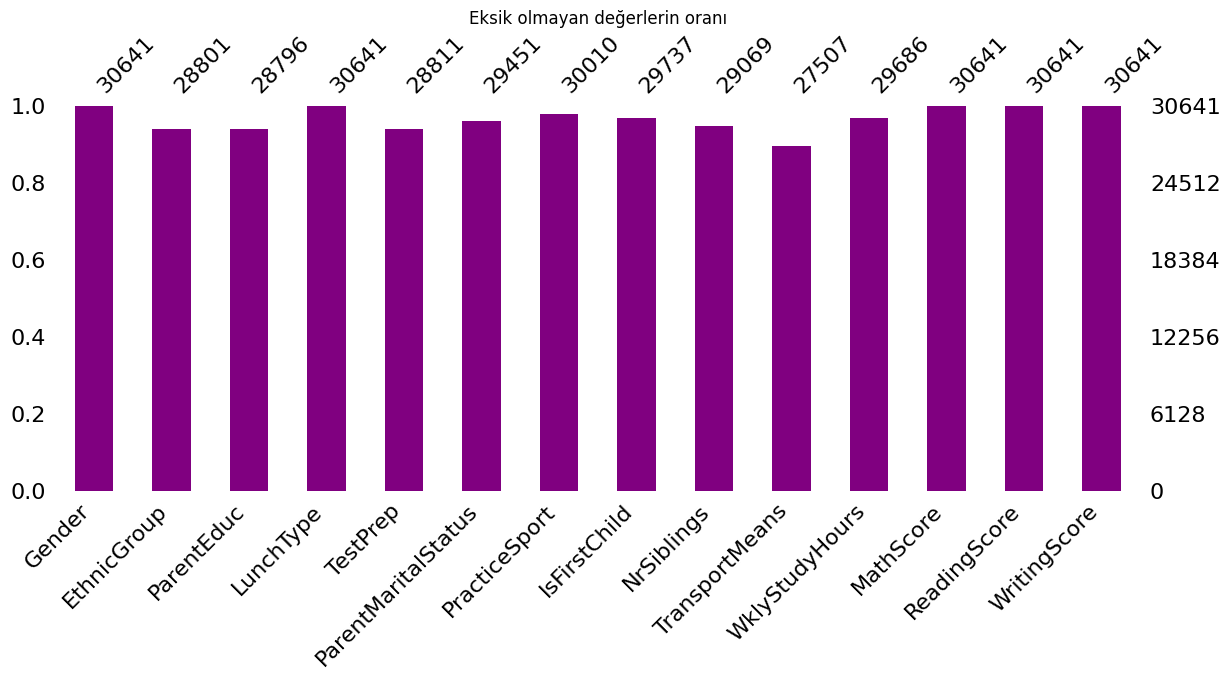

In [10]:
#msno ile eksik değerleri grafik ile görselleştirme:
msno.bar(figsize=(14, 5), df=all_data_copy, color="purple")
plt.title("Eksik olmayan değerlerin oranı")

**Burada**; MathScore adlı hedef değişkenin (target variable) dağılımını ve temel istatistiksel özelliklerini görselleştirmek için üç farklı grafik oluştururuz. Bu, değişkenin veri yapısını anlamamız ve analiz için hazırlık yapmak açısından önemlidir.
Çizdirdiğimiz grafikler ve açıklamaları:


1.   Histogram ve Yoğunluk Grafiği (kde): Veri dağılımını incelemek.
2.   Boxplot: Aykırı değerleri (outliers) ve veri setinin temel istatistiksel özetini görmek.
3.   Q-Q Plot: Veri setinin normal dağılıma uyup uymadığını test etmek.


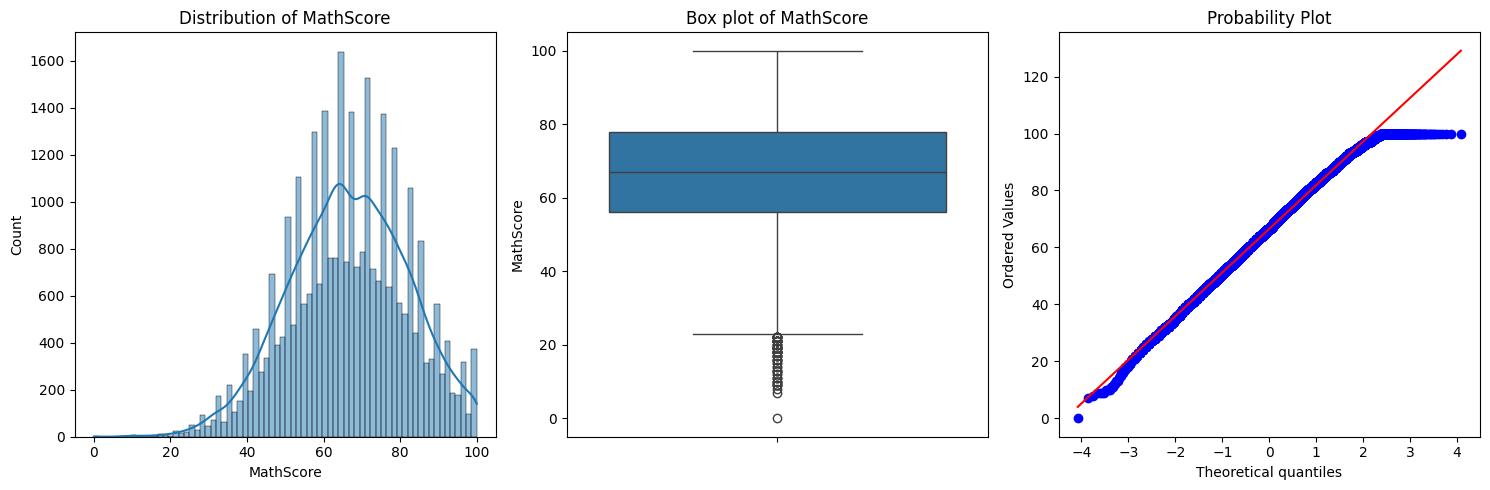

In [11]:
# Matematik Puanlarının(MathScore değişkeni) Grafiklerle Görselleştirilmesi:

plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.histplot(data=all_data_copy, x="MathScore", kde=True)
plt.title("Distribution of MathScore")

plt.subplot(132)
sns.boxplot(data=all_data_copy, y="MathScore")
plt.title("Box plot of MathScore")

plt.subplot(133)
stats.probplot(all_data_copy["MathScore"], plot=plt, dist='norm')

plt.tight_layout()
plt.show()

**Grafiklerin açıklaması:**

Yukarıdaki grafiklerde görüldüğü gibi hedef değişken sola doğru çarpıktır.  Hedef değişkenin sola doğru çarpık (negatively skewed) olduğunu söylemek, veri dağılımının sol tarafa doğru (daha düşük değerlere) uzadığını ve sağ tarafta (daha yüksek değerlerde) yoğunlaştığını ifade eder. Bu durum, dağılımın asimetrik olduğunu ve veri değerlerinin büyük bir kısmının yüksek değerlere odaklandığını gösterir.

**-Buradan, öğrencilerin çoğunun matematikte yüksek performans gösterdiğini ve çok az öğrencinin düşük aldığını çıkarabiliriz.**

-Veri setindeki çarpıklık, bazı algoritmaların (örneğin, doğrusal regresyon gibi) performansını etkileyebilir.

**Sonuç olarak;**

1-Random Forest gibi algoritmalar çarpık veri dağılımlarında bize daha iyi performans gösterebilir.

2-Normalizasyon: Modelleme öncesi veriyi yeniden ölçeklendirmek (normalizasyon) çalışmamız da faydalı olabilir.

In [12]:
# Kategorik ve sayısal değişkenlere ait sütunlar

num_cols = []
cat_cols = []

for col in all_data_copy.columns:
    if all_data_copy[col].dtype != 'object':
        num_cols.append(col)
    else:
        cat_cols.append(col)
print("Categorical features:", cat_cols)
print("Numerical features:", num_cols)

Categorical features: ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours']
Numerical features: ['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']


DataFrame'deki sütunları, veri türlerine (dtypes) göre kategorik (categorical) ve sayısal (numerical) olarak iki gruba ayırdık. Veriyi daha iyi anlamak ve farklı türdeki sütunlara uygun analizler yapmak için bunu kullanıyoruz.

In [13]:
#Sayısal sütunlar arası Korelesyon(ilişki) matrisi hesaplama:

correlation_matrix = all_data_copy.corr(numeric_only=True)
print(correlation_matrix["MathScore"].sort_values(ascending=False))

MathScore       1.000000
ReadingScore    0.817825
WritingScore    0.807118
NrSiblings     -0.001195
Name: MathScore, dtype: float64


DataFrame'deki sayısal sütunlar arasındaki korelasyon matrisini hesaplayadık.MathScore değişkeni ile diğer sayısal değişkenler arasındaki korelasyonları sıraladık. Böylece hedef değişkenimiz olan MathScore üzerindeki etkisi en büyük olan değişkenleri belirleriz. İstersek bunu çıkarabiliriz.

Korelasyon katsayısı, iki değişken arasındaki doğrusal ilişkiyi ölçer ve -1 ile 1 arasında bir değer alır:

*1: Pozitif doğrusal ilişki (bir değişken artarken diğeri de artar).

*−1: Negatif doğrusal ilişki (bir değişken artarken diğeri azalır).

*0: Hiçbir doğrusal ilişki yok demektir.

-MathScore ile kendisi arasındaki korelasyon 1.0'dır (tam ilişki var demektir).

-WritingScore (0.807) ve ReadingScore (0.817), MathScore ile çok güçlü pozitif korelasyona sahiptir.

-NrSiblings ile MathScore arasında negatif yönde ve ilişki düşüktür (korelasyon katsayısı -0.001).

### **Grafiklerle Değişkenler Arasındaki İlişikilerin İncelenmesi:**

**1- MathScore hedef değişkeni ile diğer sayısal değişkenler arasındaki ilişkiler:**

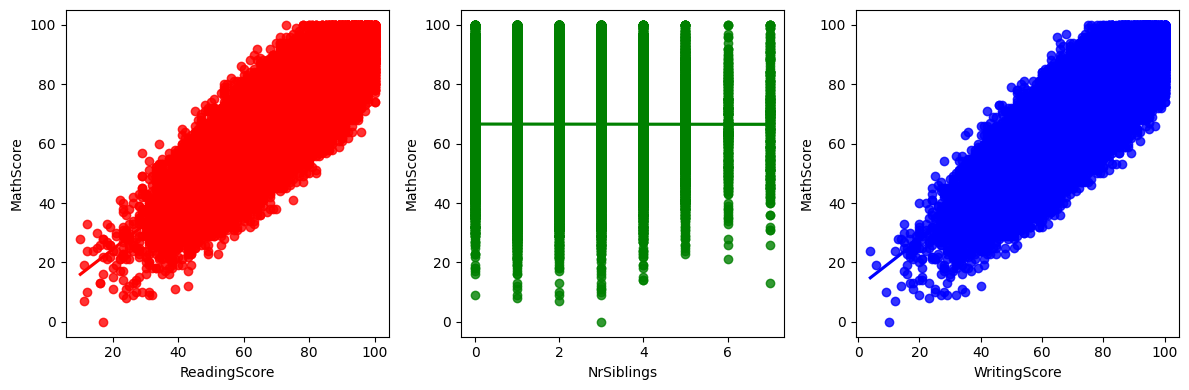

In [14]:
#MathScore hedef değişkeni ile diğer sayısal değişkenler arasındaki ilişki:

plt.figure(figsize=(12,4))

plt.subplot(131)
sns.regplot(x=all_data_copy["ReadingScore"], y=all_data_copy["MathScore"], color="Red")

plt.subplot(132)
sns.regplot(x=all_data_copy["NrSiblings"], y=all_data_copy["MathScore"], color="Green")

plt.subplot(133)
sns.regplot(x=all_data_copy["WritingScore"], y=all_data_copy["MathScore"], color="Blue")

plt.tight_layout()
plt.show()

 **Grafiklerin açıklaması**;

 MathScore hedef değişkeni ile diğer değişkenler (ReadingScore, NrSiblings, WritingScore) arasındaki ilişkileri(pozitif, negatif veya ilişkisizlik) görselleştirmek için **regresyon grafikleri** (**regression plots**) oluşturalım.

 -**Amacımız**, bu değişkenler ile hedef değişken arasındaki doğrusal ilişkiyi anlamak ve ilişkiyi güçlendiren bir çizgi ile görselleştirmektir.

 -Görselleştirme, değişkenler arasında anlamlı bir ilişki olup olmadığını belirlemeye yardımcı olur. Grafikler, hangi değişkenlerin hedef değişken üzerinde daha güçlü bir etkiye sahip olduğunu anlamak için bize yol gösterir.

 **Sonuç**:

 **Buradan, ReadingScore ve WritingScore'un MathScore'ları güçlü bir şekilde etkileyebileceği sonucunu çıkarıyoruz.**

 *Güçlü İlişkiler: ReadingScore ve WritingScore, MathScore ile güçlü pozitif doğrusal ilişkiye sahiptir ve matematik başarısını etkileyen önemli faktörlerdir.

 *Zayıf İlişki: NrSiblings, MathScore ile belirgin bir ilişki göstermemektedir, bu nedenle tahmin için kullanışlı olmayabilir.

 ***Modelleme için: ReadingScore ve WritingScore, modelleme için önemli özellikler olarak kullanılabilir. NrSiblings ise modelden çıkarılabilir.**

**2- MathScore hedef değişkeni ile diğer kategorik değişkenler arasındaki ilişkiler:**

<ipython-input-15-cba1f6b968fb>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, x=column, ax=axes[row, col], palette="viridis")
<ipython-input-15-cba1f6b968fb>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, x=column, ax=axes[row, col], palette="viridis")
<ipython-input-15-cba1f6b968fb>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, x=column, ax=axes[row, col], palette="viridis")
<ipython-input-15-cba1f6b968fb>:28: FutureWarning: 

Passing `palette` without assigning `h

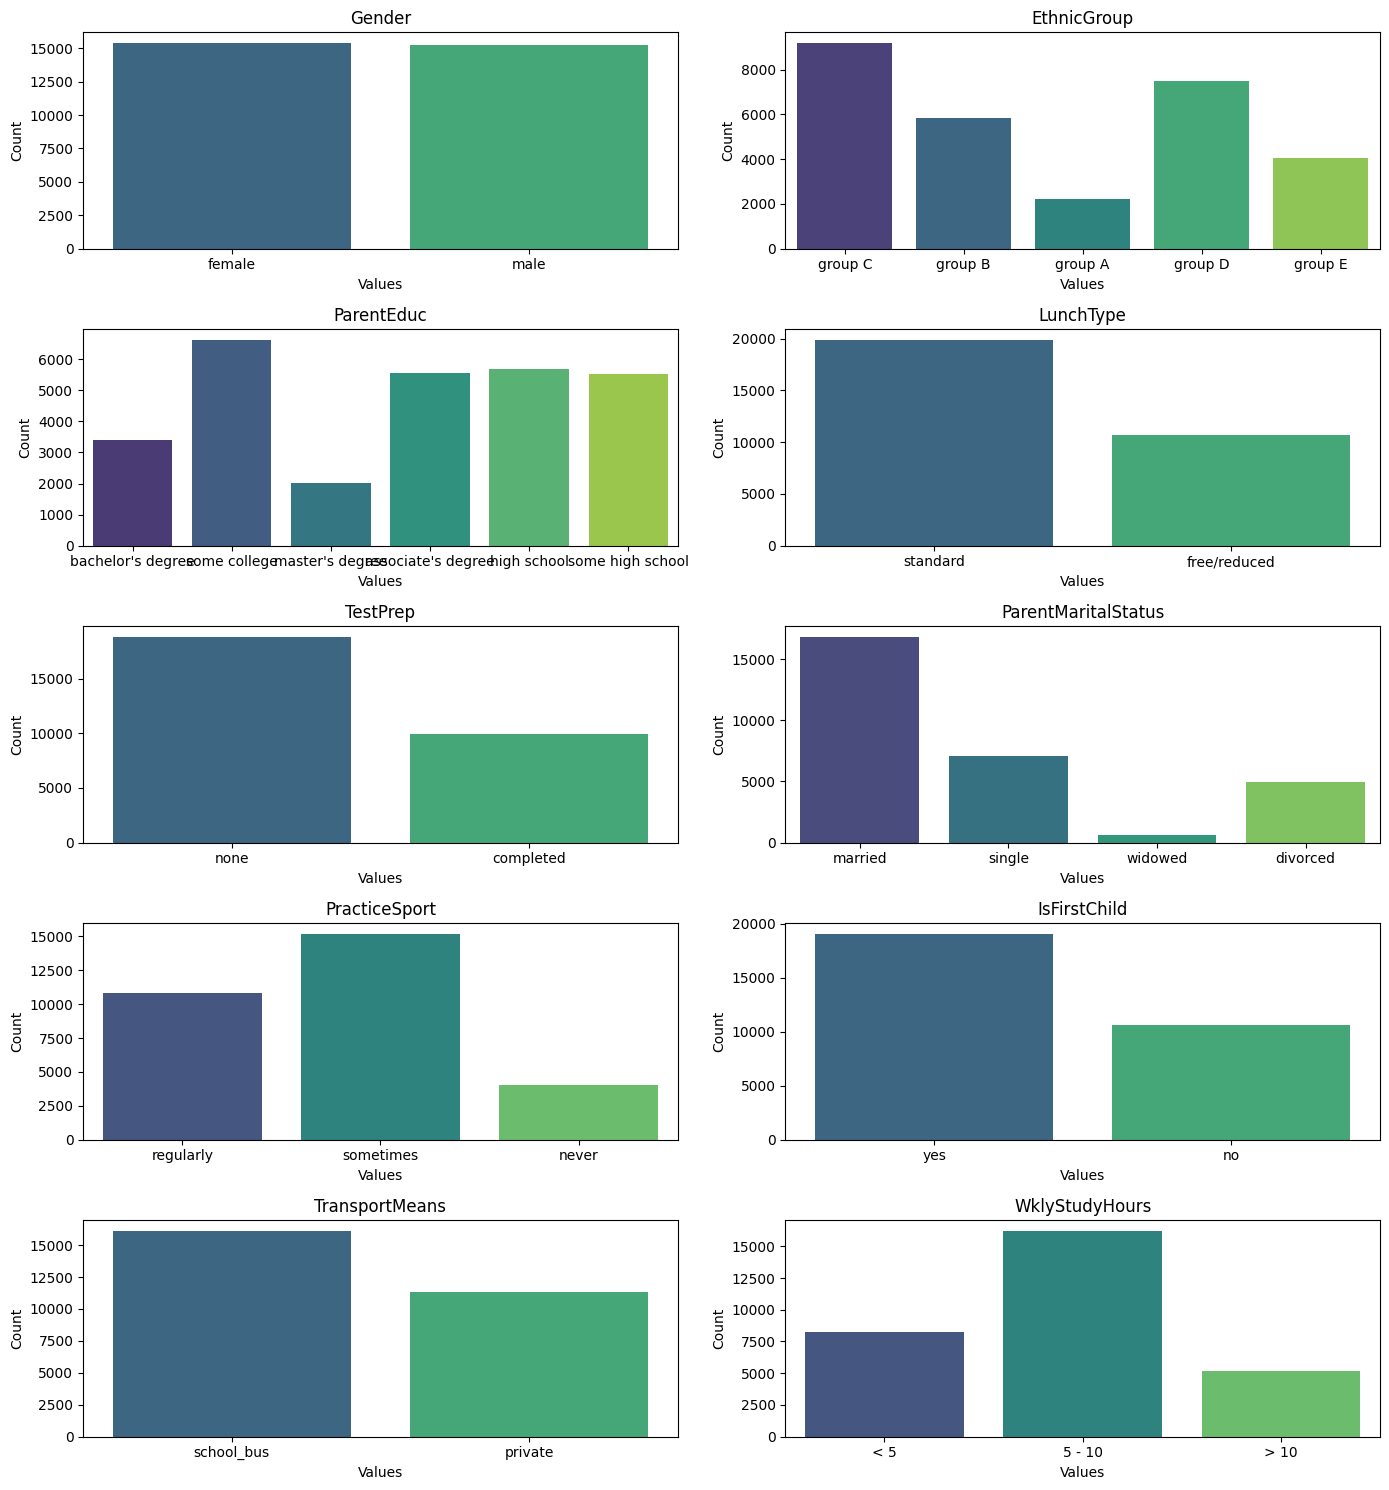

In [15]:
# Veri setinde yer alan kategorik değişkenleri grafiklerle görselleştirme:

import seaborn as sns
import matplotlib.pyplot as plt

# Eksik değerleri doldurma:
all_data_copy = all_data_copy.fillna("Missing")

#Sütunların liste değişkenine aktarılması
column_list = cat_cols

# Satır ve sütun sayısını hesapla:
num_rows = (len(column_list) + 1) // 2
num_cols = 2

# Grafikleri oluşturma:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 15))

# Sütunlar üzerinde döngü:
for idx, column in enumerate(column_list):
    try:
        row = idx // num_cols
        col = idx % num_cols
        # Eksik değerleri grafikten çıkarma:
        filtered_data = all_data_copy[all_data_copy[column] != "Missing"]

        # Çubuklar için her kategoriye farklı renkler atama:
        sns.countplot(data=filtered_data, x=column, ax=axes[row, col], palette="viridis")
        axes[row, col].set_title(column)
        axes[row, col].set_xlabel('Values')
        axes[row, col].set_ylabel('Count')
    except Exception as e:
        print(f"Hata sütununda: {column}")
        print(e)

plt.tight_layout()
plt.show()


**Üstteki Grafiklerin Genel Yorumu:**

Bu grafikler; bize veri setinde yer alan değerleri görsel olarak ortaya koymaktadır.

Şimdi aşağıdaki grafiklerle bu değişkenlerin, tek tek matematik puanları ile arasındaki ilişkileri inceleyelim...

Text(0.5, 1.0, 'Relationship between Gender and Math Score')

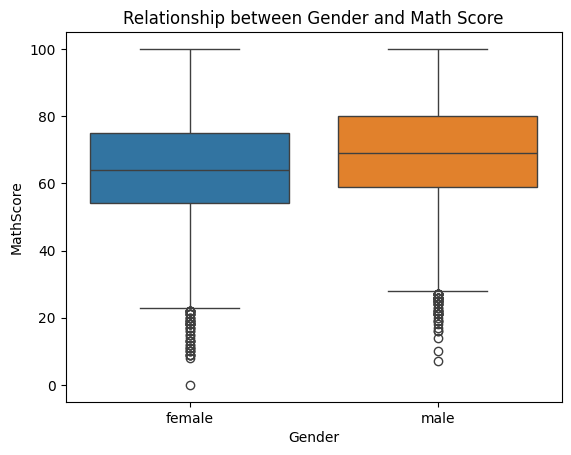

In [16]:
#Matematik puanları ve cinsiyet arasındaki ilişki:

sns.boxplot(x='Gender', y='MathScore', data=all_data_copy, hue='Gender')
plt.title('Relationship between Gender and Math Score')

**Üstteki Grafiğin Yorumlanması:**

Matematikte erkek öğrencilerin, kız öğrencilerden daha iyi performans gösterdiğini grafikten çıkarıyoruz. Bu, daha yüksek medyan ve %25 lik puanlarla kendini göstermektedir.


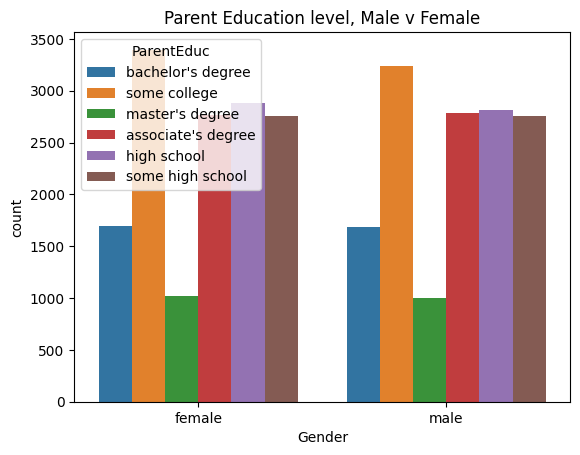

In [17]:
#Parent Education & Gender: Cinsiyet ve Ebeveyn eğitim düzeyi arasındaki ilişkiÇ

# 'Missing' değerleri filtreleme
filtered_data = all_data_copy[all_data_copy['ParentEduc'] != "Missing"]

# Grafik oluşturma
sns.countplot(data=filtered_data, x='Gender', hue='ParentEduc')
plt.title("Parent Education level, Male v Female")
plt.show()


**Üstteki Grafiğin Yorumlanması:**

Ebeveynlerin eğitim düzeyi iki cinsiyet arasında hemen hemen aynı olduğunu görmekteyiz. Lisansüstü eğitim düzeyinde hafif bir fark görülür, burada kız öğrencilerin, erkek öğrencilere kıyasla; lisansüstü eğitim derecesi almış daha fazla ebeveyni vardır diyebiliriz.


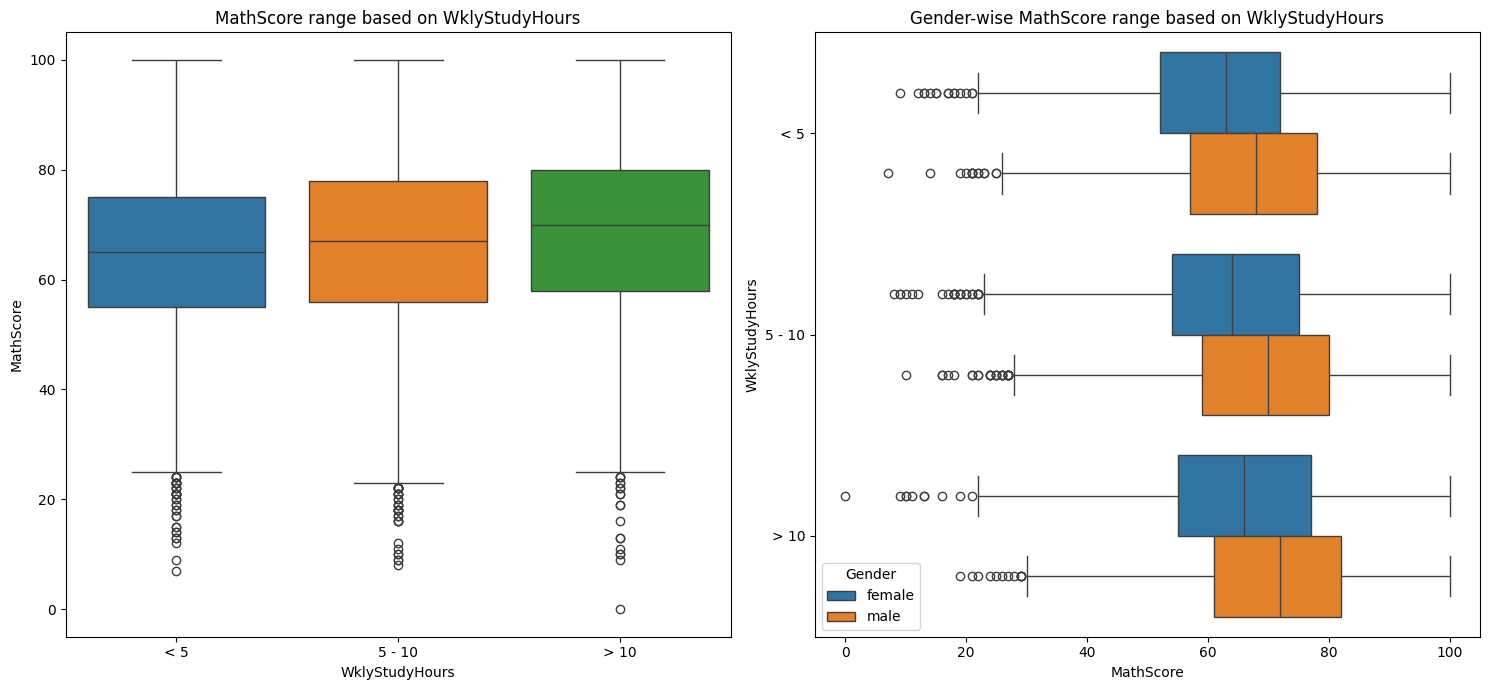

In [18]:
#Wkly Study Hours(Haftalık çalışma saatleri) İle Mathscore ilişkisini İnceleme:

# 'Missing' değerleri filtreleme:
filtered_data = all_data_copy[all_data_copy['WklyStudyHours'] != "Missing"]

# Grafik oluşturma:
plt.figure(figsize=(15, 7))

# İlk boxplot:
plt.subplot(121)
sns.boxplot(x='WklyStudyHours', y='MathScore', data=filtered_data, hue='WklyStudyHours')
plt.title("MathScore range based on WklyStudyHours")

# İkinci boxplot:
plt.subplot(122)
sns.boxplot(y='WklyStudyHours', x='MathScore', data=filtered_data, hue='Gender')
plt.title("Gender-wise MathScore range based on WklyStudyHours")

plt.tight_layout()
plt.show()


**Üstteki Grafiklerin Yorumlanması:**

İki grafikten de şu sonucu çıkarılabiliriz:

Haftalık çalışma süresi ne kadar artarsa, bu her iki cinsiyetteki öğrencilerin de daha yüksek Matematik notu almalarını sağlar.

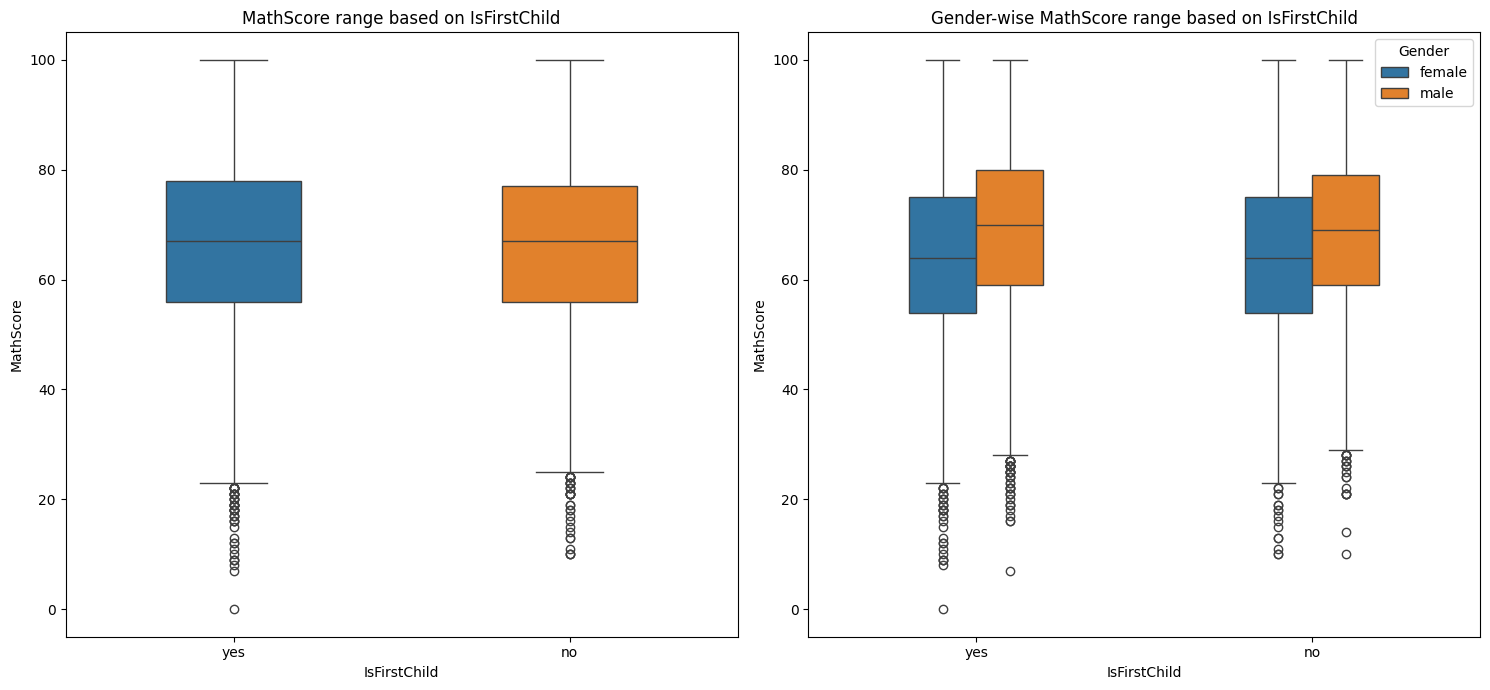

In [19]:
#IsFirstChild İle Mathscore ilişkisini İnceleme:

# 'Missing' değerleri filtreleme:
filtered_data = all_data_copy[all_data_copy['IsFirstChild'] != "Missing"]

# Grafik oluşturma:
plt.figure(figsize=(15, 7))

# İlk boxplot:
plt.subplot(121)
sns.boxplot(x='IsFirstChild', y='MathScore', data=filtered_data, hue='IsFirstChild', width=0.4)
plt.title("MathScore range based on IsFirstChild")

# İkinci boxplot:
plt.subplot(122)
sns.boxplot(x='IsFirstChild', y='MathScore', data=filtered_data, hue='Gender', width=0.4)
plt.title("Gender-wise MathScore range based on IsFirstChild")

plt.tight_layout()
plt.show()


**Üstteki Grafiklerin Yorumlanması:**

Bundan, ilk çocuk olmanın MathScore üzerinde çok az etkisi olduğunu yani neredeyse etkisi olmadığı sonucunu çıkarıyoruz.

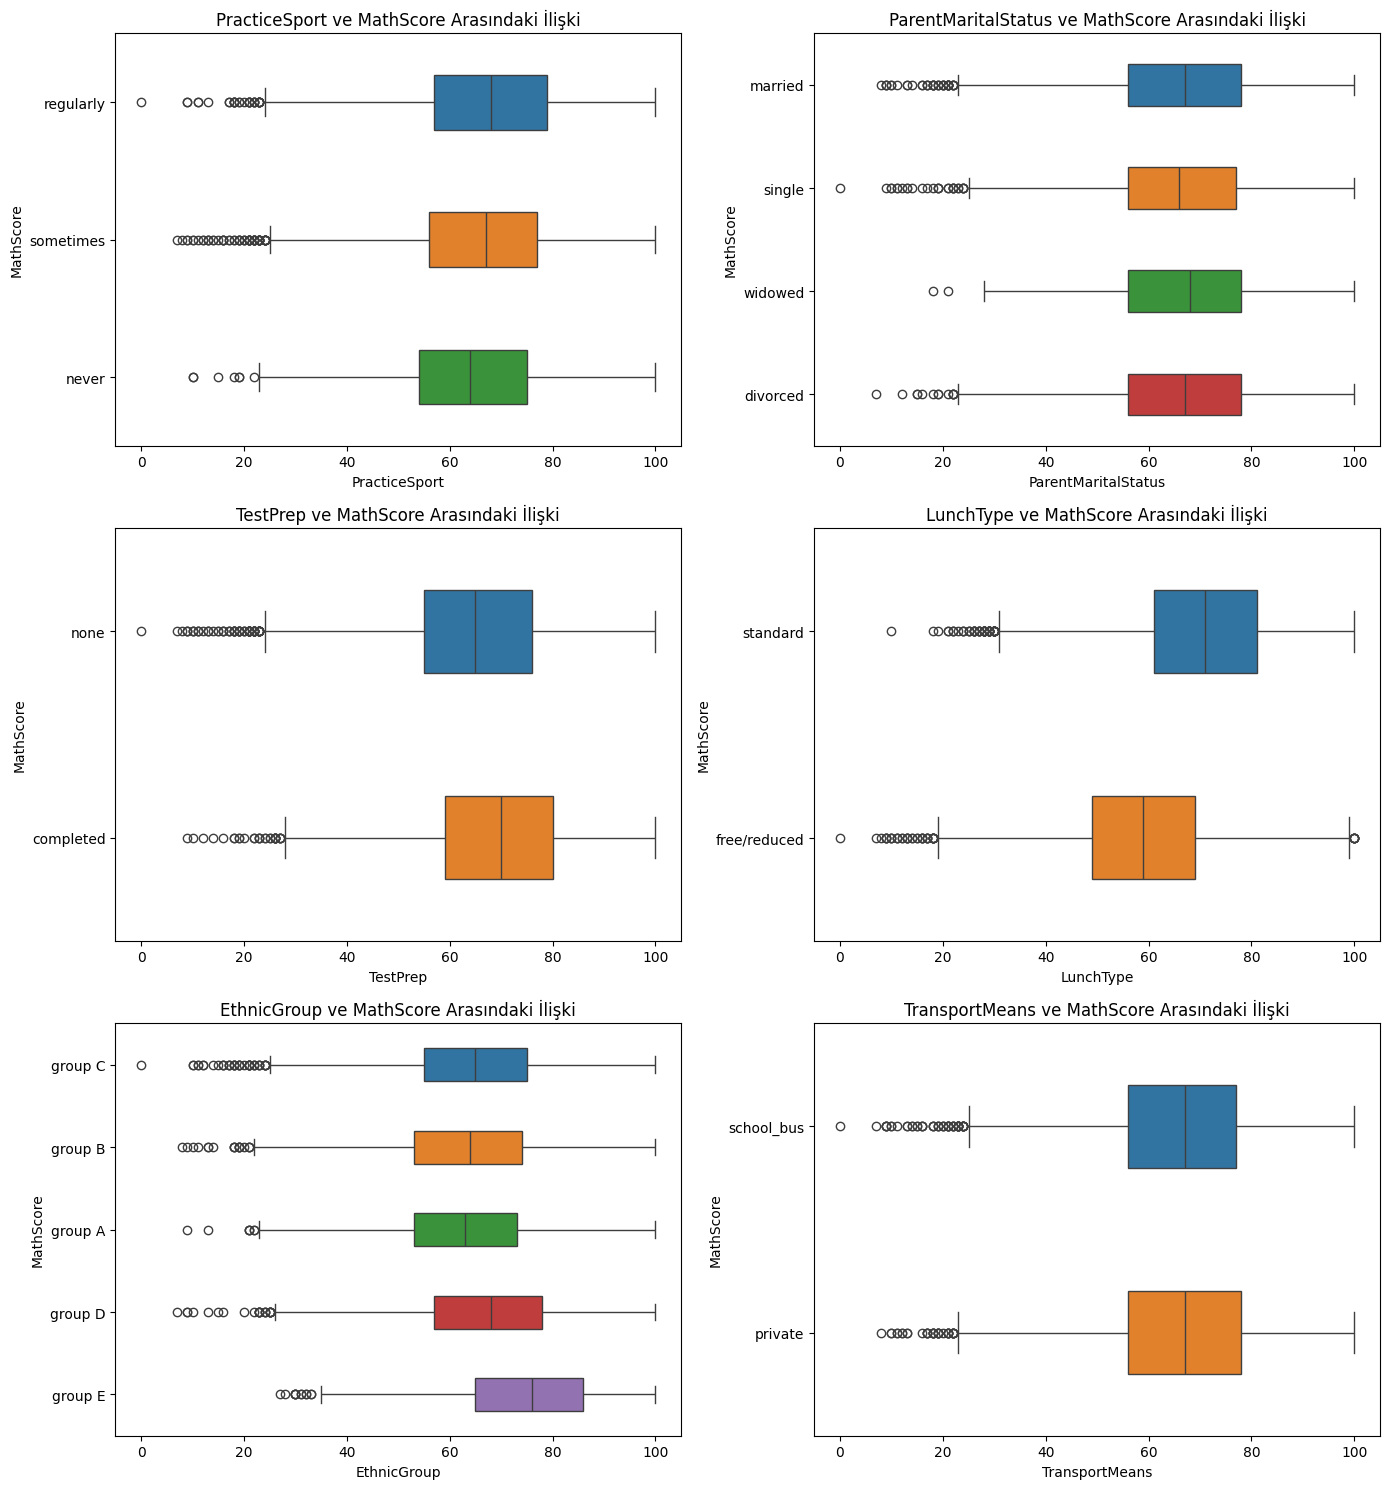

In [20]:
#PracticeSport, ParentMaritalStatus, TestPrep, LunchType, EthnicGroup, TransportMeans değişkenleri İle Mathscore ilişkisini İnceleme:

to_plot = ["PracticeSport", "ParentMaritalStatus", "TestPrep", "LunchType", "EthnicGroup", "TransportMeans"]

# Çizilecek sütunların listesi:
column_list = to_plot

# Kaç satır ve sütun gerektiğini hesaplama:
num_rows = (len(column_list) + 1) // 2
num_cols = 2

# Alt grafiklerin oluşturulması:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 15))

# Her sütun için döngü:
for idx, column in enumerate(column_list):
    # 'Missing' değerlerini çıkar
    filtered_data = all_data_copy[all_data_copy[column] != "Missing"]

    # Satır ve sütun konumlarını belirleme:
    row = idx // num_cols
    col = idx % num_cols

    # Grafikleri oluşturma:
    sns.boxplot(data=filtered_data, y=column, x='MathScore', hue=f'{column}', ax=axes[row, col], width=0.4)
    axes[row, col].set_title(f"{column} ve MathScore Arasındaki İlişki")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('MathScore')

plt.tight_layout()
plt.show()


**Üstteki Grafiklerin Yorumlanması:**

-Spor yapan öğrenciler, spor yapmayanlara göre matematikte daha iyi performans gösteriyor.

-Ebeveynleri evli olan öğrenciler, ebeveyni evli olmayanlara göre biraz daha iyi performans gösteriyor.

-Test hazırlık kursuna giden öğrenciler(Testprep) gitmeyenlere göre nispeten daha iyi performans gösteriyor.

-Çarpıcı bir sonuç olarak; standart öğle yemeği yiyen öğrenciler, indirimli/ücretsiz öğle yemeği yiyenlere göre Matematikte çok daha iyi performans gösteriyor.

-Etnik Grup E'den öğrenciler, kaydedilen diğer etnik gruplardan meslektaşlarına kıyasla Matematikte daha iyi performans gösteriyor.

-Okul otobüsüne binen öğrenciler, özel araç kullananlara göre Matematikte biraz daha iyi performans gösteriyorlar.

### **Veri Ön İşleme:**

Eksik değerler, aykırı değerler ve hatalı girişleri belirleme ve bunları uygun olan şekilde yeniden düzenleme, doldurma işlemleri.

**Önce veri setindeki sütunlarda yer alan değişkenlerin veri tiplerini yazdıralım:**

In [21]:
all_data_copy.dtypes

,0
Gender,object
EthnicGroup,object
ParentEduc,object
LunchType,object
TestPrep,object
ParentMaritalStatus,object
PracticeSport,object
IsFirstChild,object
NrSiblings,object
TransportMeans,object


**Hangi sütunların eksik değerlere sahip olduğunu belirleme işlemi ve o sütunların veri tiplerini yazdırma:**

In [22]:
for col in all_data_copy.columns:
    print(f"{col}: {all_data_copy[col].unique()}")

Gender: ['female' 'male']
EthnicGroup: ['Missing' 'group C' 'group B' 'group A' 'group D' 'group E']
ParentEduc: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school' 'Missing']
LunchType: ['standard' 'free/reduced']
TestPrep: ['none' 'Missing' 'completed']
ParentMaritalStatus: ['married' 'single' 'widowed' 'Missing' 'divorced']
PracticeSport: ['regularly' 'sometimes' 'never' 'Missing']
IsFirstChild: ['yes' 'no' 'Missing']
NrSiblings: [3.0 0.0 4.0 1.0 'Missing' 2.0 5.0 7.0 6.0]
TransportMeans: ['school_bus' 'Missing' 'private']
WklyStudyHours: ['< 5' '5 - 10' '> 10' 'Missing']
MathScore: [ 71  69  87  45  76  73  85  41  65  37  58  40  66  80  48  88  18  46
  50  42  74  75  70  63  56  97  81  51  77  53  59  60  67  82  54  33
  84  52  61   0  39  62  64  47  44  28  49  57  27  68  79 100  72  98
  55  90  86  89  21  96  91  99  83  35  43  93  78  94  36  29  23  92
  26  38  95  30  32   8  34  31  25  22  17  20  16  19  

**Sonuçta;**

 Eksik değerlere sahip sütunlar: missing olarak görünüyor. Bu, veri setinde **NaN** olarak tanımlanmış eksik değerler bulunmadığını bize gösteriyor. Eksik değerler başka bir formatta (örneğin, "Missing", boş string "" veya başka bir özel değer) saklanıyor olabilir. Bunu bulmak için yukarıdaki kodu kullandım. Eksik değerlerin **Missing** olduğunu görüntüledim.

In [23]:
#Eksik değerlere sahip sütunları bulma:

# 'Missing' veya boş string değerlerini NaN ile değiştirme:
all_data_copy.replace(["Missing", ""], pd.NA, inplace=True)

# Eksik değerlere sahip sütunları kontrol etme ve yazdırma:
null_cols = [col for col in all_data_copy.columns if all_data_copy[col].isnull().any()]

# Eksik değerlerin sayısı ve veri türlerini yazdırma:
for col in null_cols:
    print(f"{col}: Eksik değer sayısı = {all_data_copy[col].isnull().sum()}, Veri türü = {all_data_copy[col].dtype}")

print("\nEksik değerlere sahip sütunlar:", null_cols)


EthnicGroup: Eksik değer sayısı = 1840, Veri türü = object
ParentEduc: Eksik değer sayısı = 1845, Veri türü = object
TestPrep: Eksik değer sayısı = 1830, Veri türü = object
ParentMaritalStatus: Eksik değer sayısı = 1190, Veri türü = object
PracticeSport: Eksik değer sayısı = 631, Veri türü = object
IsFirstChild: Eksik değer sayısı = 904, Veri türü = object
NrSiblings: Eksik değer sayısı = 1572, Veri türü = object
TransportMeans: Eksik değer sayısı = 3134, Veri türü = object
WklyStudyHours: Eksik değer sayısı = 955, Veri türü = object

Eksik değerlere sahip sütunlar: ['EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours']


**Üstteki kodla**:

Eksik değerlere sahip olan sütunları ve eksik değer sayılarını yazdırdım. 'Missing' veya boş string değerlerini NaN ile değiştirdim.

In [24]:
# Her sütundaki benzersiz değerleri yazdırma:

for col in null_cols:
    print(all_data_copy[col].value_counts())

EthnicGroup
group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
Name: count, dtype: int64
ParentEduc
some college          6633
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: count, dtype: int64
TestPrep
none         18856
completed     9955
Name: count, dtype: int64
ParentMaritalStatus
married     16844
single       7097
divorced     4919
widowed       591
Name: count, dtype: int64
PracticeSport
sometimes    15213
regularly    10793
never         4004
Name: count, dtype: int64
IsFirstChild
yes    19082
no     10655
Name: count, dtype: int64
NrSiblings
1.0    8217
2.0    6790
3.0    6123
0.0    3085
4.0    2941
5.0    1320
6.0     302
7.0     291
Name: count, dtype: int64
TransportMeans
school_bus    16145
private       11362
Name: count, dtype: int64
WklyStudyHours
5 - 10    16246
< 5        8238
> 10       5202
Name: count, dtype: int64


**Veri setinin ilk 20 satırını görüntüleyelim:**

In [25]:
import numpy as np

# <NA> değerlerini NaN ile değiştirme:
all_data_copy = all_data_copy.replace({pd.NA: np.nan})

# Değişikliğin kontrol edilmesi:
all_data_copy.head(20)


<ipython-input-25-fef1c7200921>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_data_copy = all_data_copy.replace({pd.NA: np.nan})


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


**Eksik Değerlerin İşlenmesi:**

Eksik değerleri sütun türüne uygun şekilde doldurarak veri setini eksik değerlerden arındıralım:

Sütunlardaki: null veya NaN değerler

In [26]:
# Eksik değerlere sahip sütunların işlenmesi:

# Eksik değerlere sahip sütunlarda döngüye alma:
for col in null_cols:
    if all_data_copy[col].dtype == 'object':
        # 'none' değerlerini 'Bilinmiyor' ile değiştirme:
        all_data_copy[col].replace('none', 'Bilinmiyor', inplace=True)
        # NaN değerlerini 'VeriYok' ile doldur
        all_data_copy[col].fillna('VeriYok', inplace=True)
    else:
        # Sayısal sütunlar için sütunun medyanını hesaplama:
        col_median = all_data_copy[col].median()
        # NaN değerlerini medyan ile doldurma:
        all_data_copy[col].fillna(col_median, inplace=True)

# Eksik değerler işlendikten sonra veri çerçevesini yazdırma:
print("Eksik değerler işlendi:")
print(all_data_copy)


Eksik değerler işlendi:
     Gender EthnicGroup          ParentEduc     LunchType    TestPrep  \
0    female     VeriYok   bachelor's degree      standard  Bilinmiyor   
1    female     group C        some college      standard     VeriYok   
2    female     group B     master's degree      standard  Bilinmiyor   
3      male     group A  associate's degree  free/reduced  Bilinmiyor   
4      male     group C        some college      standard  Bilinmiyor   
..      ...         ...                 ...           ...         ...   
816  female     group D         high school      standard  Bilinmiyor   
890    male     group E         high school      standard  Bilinmiyor   
911  female     VeriYok         high school  free/reduced   completed   
934  female     group D  associate's degree      standard   completed   
960    male     group B        some college      standard  Bilinmiyor   

    ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0               ma

<ipython-input-26-8790cb287931>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data_copy[col].replace('none', 'Bilinmiyor', inplace=True)
<ipython-input-26-8790cb287931>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

**Eksik Değerleri Kontrol Etme ve Görselleştirme:**

Text(0.5, 1.0, 'Veri eksiksizliğini gösteren çubuk grafik')

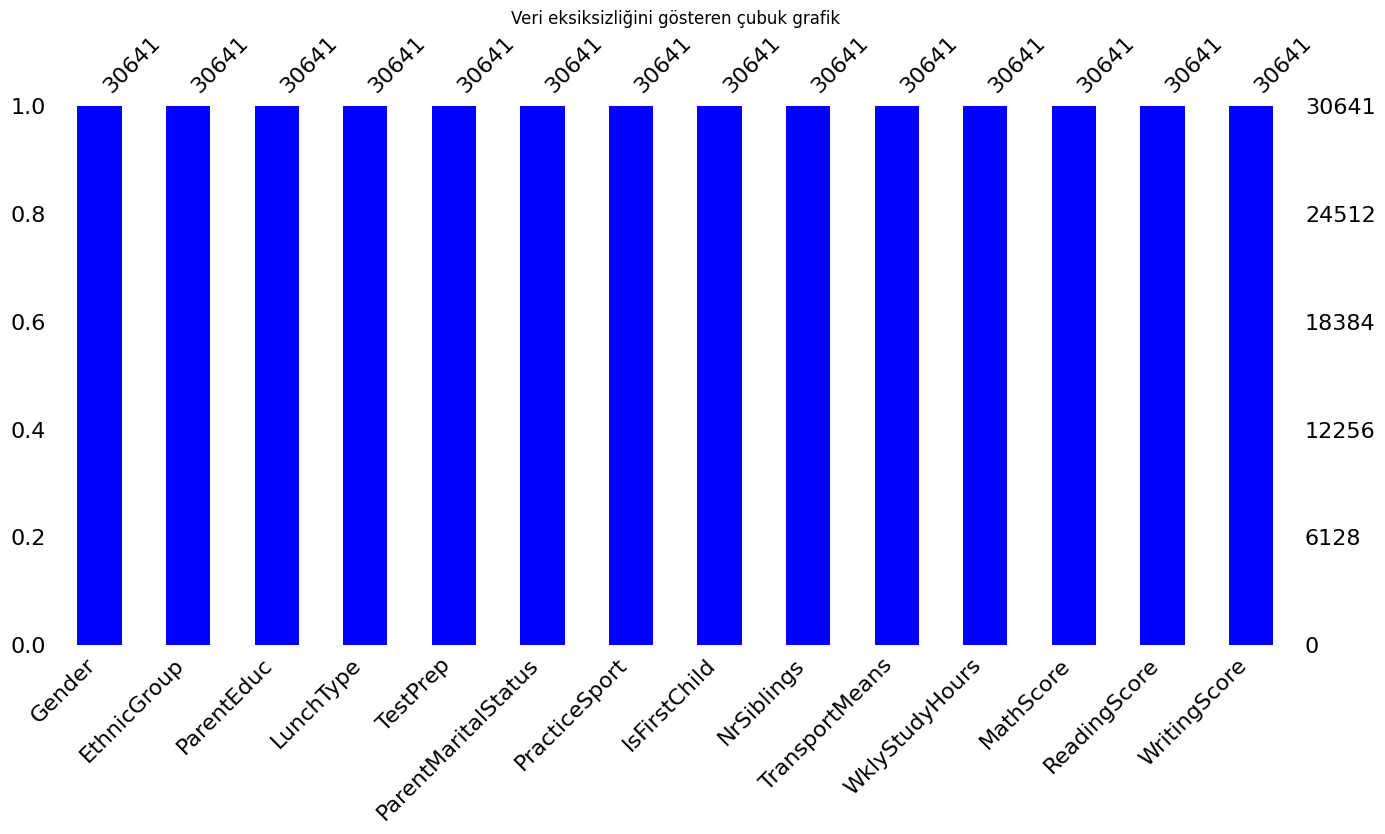

In [27]:
# Eksik değerlerin kontrol edilmesi ve görselleştirme:

msno.bar(figsize=(16, 7), df=all_data_copy, color="blue")
plt.title("Veri eksiksizliğini gösteren çubuk grafik")

**Üstteki grafikle yaptığımız görselleştirmede** verilerimizde eksik değer olmadığını görebiliyoruz.

In [28]:
#Şimdi ilk birkça satırı görüntüleyelim:

all_data_copy.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,VeriYok,bachelor's degree,standard,Bilinmiyor,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,VeriYok,married,sometimes,yes,0.0,VeriYok,5 - 10,69,90,88
2,female,group B,master's degree,standard,Bilinmiyor,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,Bilinmiyor,married,never,no,1.0,VeriYok,5 - 10,45,56,42
4,male,group C,some college,standard,Bilinmiyor,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


**Yukarıda yaptığımız "Keşifsel Veri Analizi (Exploratory Data Analysis, EDA)" ile** bu özniteliklerden, öğrenci performansı veya diğer önemli sonuçlarla ilişkilendirilmesinin faydalı olabileceğini bizlere gösterdiği öznitelikleri belirlemiş olduk.

**Yani modelleme veya sonuçlar üzerinde etkili olabilecek bazı önemli sütunları (özellikler) belirledim.**

Bunlar şu şekildedir:  

-ReadingScore

-WritingScore

-PracticeSport  

-LunchType  

-TestPrep  

-TransportMeans

-WklyStudyHours

-EthnicGroup

-Gender

-ParentMaritalStatus

In [29]:
#import required dependencies
from sklearn.preprocessing import OrdinalEncoder

**Kategorik özellikleri (string) sayısal değerlere dönüştürerek, modelleme ve analizde kullanılabilir hale getirme işlemleri:**

OrdinalEncoder: Kategorik verileri her kategoriye bir sıra numarası atayarak sayısal değerlere dönüştüren bir araçtır (örneğin, "Male" -> 0, "Female" -> 1 gibi ).

Veri setimizdeki kategorik değişkenleri **Ordinal Encoding** yöntemiyle **sayısal değerlere dönüştürelim:**

-Kategorik sütunları (string) sayısal değerlere çevirelim.

-Encode edilmiş sütunları orijinal veri çerçevesiyle birleştirelim.

-Son olarak modelleme veya analiz için uygun hale getirelim.

In [30]:
# Encode edilecek özelliklerin bir listesini oluşturalım:

features = ['PracticeSport', 'ParentMaritalStatus',
            'LunchType', 'TestPrep', 'TransportMeans', 'WklyStudyHours',
            'EthnicGroup', 'Gender']

# Orijinal sütun adlarını saklama:
original_col_names = all_data_copy[features].columns.tolist()

# OrdinalEncoder'ı başlatma:
encoder = OrdinalEncoder()
# Encode işlemini veri üzerinde uygulama ve dönüştürme işlemi:
df_encoded = pd.DataFrame(encoder.fit_transform(all_data_copy[features]),
                          columns=original_col_names)

# Orijinal ve encode edilmiş DataFrame'lerin indekslerini sıfırlama:
all_data_copy.reset_index(drop=True, inplace=True)
df_encoded.reset_index(drop=True, inplace=True)

# Encode edilmiş sütunları orijinal DataFrame ile birleştirme işlemi:
df_final = pd.concat([all_data_copy.drop(columns=features), df_encoded], axis=1)

print("Orijinal DataFrame:")
print(all_data_copy)
print("\nOrdinal encoding sonrası DataFrame:")
print(df_final)


Orijinal DataFrame:
       Gender EthnicGroup          ParentEduc     LunchType    TestPrep  \
0      female     VeriYok   bachelor's degree      standard  Bilinmiyor   
1      female     group C        some college      standard     VeriYok   
2      female     group B     master's degree      standard  Bilinmiyor   
3        male     group A  associate's degree  free/reduced  Bilinmiyor   
4        male     group C        some college      standard  Bilinmiyor   
...       ...         ...                 ...           ...         ...   
30636  female     group D         high school      standard  Bilinmiyor   
30637    male     group E         high school      standard  Bilinmiyor   
30638  female     VeriYok         high school  free/reduced   completed   
30639  female     group D  associate's degree      standard   completed   
30640    male     group B        some college      standard  Bilinmiyor   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0          

In [31]:
#Şimdi de yukarıdaki işlemle birlikte ilk 20 satırın son halini görüntüleyelim:
df_final.head(20)

,ParentEduc,IsFirstChild,NrSiblings,MathScore,ReadingScore,WritingScore,PracticeSport,ParentMaritalStatus,LunchType,TestPrep,TransportMeans,WklyStudyHours,EthnicGroup,Gender
0,bachelor's degree,yes,3.0,71,71,74,2.0,2.0,1.0,0.0,2.0,1.0,0.0,0.0
1,some college,yes,0.0,69,90,88,3.0,2.0,1.0,1.0,0.0,0.0,3.0,0.0
2,master's degree,yes,4.0,87,93,91,3.0,3.0,1.0,0.0,2.0,1.0,2.0,0.0
3,associate's degree,no,1.0,45,56,42,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
4,some college,yes,0.0,76,78,75,3.0,2.0,1.0,0.0,2.0,0.0,3.0,1.0
5,associate's degree,yes,1.0,73,84,79,2.0,2.0,1.0,0.0,2.0,0.0,2.0,0.0
6,some college,no,1.0,85,93,89,1.0,4.0,1.0,2.0,1.0,0.0,2.0,0.0
7,some college,yes,1.0,41,43,39,3.0,2.0,0.0,0.0,1.0,2.0,2.0,1.0
8,high school,no,3.0,65,64,68,3.0,3.0,0.0,2.0,1.0,2.0,4.0,1.0
9,high school,yes,2.0,37,59,50,2.0,2.0,0.0,0.0,1.0,1.0,2.0,0.0


**Şimdi veri setindeki tüm sütunların** benzersiz değerlerin sayımını (frekansını) alalım ve veri setindeki dağılımını kontrol edelim. Özellikle kategorik verilerdeki encode işlemini doğrulamak veya veri dağılımlarını incelemek için bunu yapıyoruz.

In [32]:
# Değişikliklerimizi inceleyelim:
for col in df_final.columns:
  # Her sütundaki benzersiz değerlerin sayısını yazdıralım:
    print(df_final[col].value_counts())
  # Sütunlar arasında boşluk eklemek için yeni bir satır yazdıralım:
    print("\n")

ParentEduc
some college          6633
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
VeriYok               1845
Name: count, dtype: int64


IsFirstChild
yes        19082
no         10655
VeriYok      904
Name: count, dtype: int64


NrSiblings
2.0    8362
1.0    8217
3.0    6123
0.0    3085
4.0    2941
5.0    1320
6.0     302
7.0     291
Name: count, dtype: int64


MathScore
64    890
67    814
71    797
70    787
63    762
     ... 
12      2
14      2
0       1
8       1
7       1
Name: count, Length: 95, dtype: int64


ReadingScore
65    1001
66     826
74     796
69     789
73     775
      ... 
12       3
11       2
15       2
10       1
14       1
Name: count, Length: 90, dtype: int64


WritingScore
67    816
72    772
66    765
65    751
64    751
     ... 
13      1
9       1
10      1
6       1
4       1
Name: count, Length: 93, dtype: int64


PracticeSport
3.0    15213
2.0    10793
1.0     

Veri setimizin **son durumdaki** satır ve sütun sayısına bakalım:

In [33]:
df_final.shape

(30641, 14)

### **Veri Setini Bölme İşlemi:**

In [34]:
#Hedef değişkeni ve öznitelikleri tanımlama:
X = df_final[features + ['ReadingScore', 'WritingScore']]
y = df_final['MathScore']

# Veri setini, test, doğrulama ve eğitim için bölme
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Veri setini eğitim ve geçici setlere ayıralım:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=1 - train_ratio, random_state=42
)

# Geçici kümeyi doğrulama ve test kümelerine bölelim:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=test_ratio / (test_ratio + val_ratio), random_state=42
)

# Ortaya çıkacak bu sınıfların boyutlarını yazdıralım
print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Train set size: 21448
Validation set size: 4596
Test set size: 4597


### **2- MODELLEME VE EĞİTİM :**

**Lineer Regresyon, Random forest Regresörü ve Karar Ağacı Regresörü modellerini eğitelim**, doğrulama verileri üzerinde tahmin yaptıralım ve her bir **modelin Ortalama Mutlak Hata (MAE) değerini hesaplayarak** performans karşılaştırmasını görelim:

In [35]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")


X_train shape: (21448, 10)
y_train shape: (21448,)
X_val shape: (4596, 10)
y_val shape: (4596,)


In [36]:
X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())
X_val = X_val.fillna(X_val.mean())
y_val = y_val.fillna(y_val.mean())

In [37]:
# İlk eğitim aşaması
from sklearn.tree import DecisionTreeRegressor

# Lineer regresyon için
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)  # Modeli eğitim verileriyle eğitme
linear_pred = linear_model.predict(X_val)  # Doğrulama verileri üzerinde tahmin yapma
print("MAE Linear reg:", mean_absolute_error(y_val, linear_pred))  # MAE'yi yazdırma

# Random forest regressor (rastgele orman regresörü) için
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)  # Modeli eğitim verileriyle eğitme
forest_pred = forest_model.predict(X_val)  # Doğrulama verileri üzerinde tahmin yapma
print("MAE Random Forest reg:", mean_absolute_error(y_val, forest_pred))  # MAE'yi yazdırma

# Karar ağacı regresörü için
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)  # Modeli eğitim verileriyle eğitme
tree_pred = tree_model.predict(X_val)  # Doğrulama verileri üzerinde tahmin yapma
print("MAE Decision Tree reg:", mean_absolute_error(y_val, tree_pred))  # MAE'yi yazdırma


MAE Linear reg: 4.558782947070201
MAE Random Forest reg: 4.7053049447289
MAE Decision Tree reg: 6.4474434290687554


**Ortalama Mutlak Hata (MAE) değerleri, üç farklı regresyon modelinin performansını karşılaştırmak için kullanılır.**

MAE, modelin tahmin ettiği değerler ile gerçek değerler arasındaki mutlak farkların ortalamasını alarak hesaplanır; bu değer ne kadar düşükse, modelin tahminleri gerçek değerlere o kadar yakındır.

**Lineer Regresyon: MAE = 4.5588**

**Random Forest Regressor: MAE = 4.7053**

**Decision Tree Regressor: MAE = 6.4474**

**Bu sonuçlara göre, Lineer Regresyon modelimiz en düşük MAE değerine sahip olup, tahminlerinde diğer modellere göre daha başarılıdır.**

Random Forest Regressor'ın MAE değeri Lineer Regresyon'a yakın olsa da, biraz daha yüksektir, bu da tahminlerinin Lineer Regresyon'dan biraz daha az iyi olduğunu gösterir. Decision Tree Regressor ise en yüksek MAE değerine sahip olup, bu üç model arasında en düşük performansı sergilemektedir.

### **Modelleri Cross Validation ile Performans Değerlendirme:**

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
# Aşırı öğrenmeyi (overfitting) azaltmak için çapraz doğrulama (cross-validation) uygulayalım.

# Modellerin örnekleri:
linear_model_2 = LinearRegression()
forest_model_2 = RandomForestRegressor(random_state=42)
tree_model_2 = DecisionTreeRegressor(random_state=42)

# Model listesi:
models = [linear_model_2, forest_model_2, tree_model_2]

# Her model için döngü oluşturalım ve çapraz doğrulama uygulayalım:
for model in models:
    # 4 katmanlı (fold) çapraz doğrulama yapalım (katman sayısı ayarlanabilir)
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=4)

    # Negatif ortalama mutlak hata (MAE) skorlarının ortalamasını hesaplama:
    mae_mean = -scores.mean()

    # Model için ortalama mutlak hatayı yazdırma:
    model_name = model.__class__.__name__
    print(f"MAE {model_name}: {mae_mean}")


MAE LinearRegression: 4.560701761732695
MAE RandomForestRegressor: 4.664350623633226
MAE DecisionTreeRegressor: 6.3929076526171835


**Sonuç üsttekilerle kıyaslanınca:**
Random Forest ve Decision Tree regresyon modellerinde biraz daha gelişmiş bir model performansı görebiliyoruz. Linear Regressor'daki performansın az da olsa düştüğünü farkediyoruz.

Birden fazla ayarlamadan sonra, her modelin performansının en güvenilir tahmini için optimum sayı olarak çapraz doğrulamayı 4 kat olarak belirledim.

**Sonuçta**, Genel olarak Lineer Regresyon modelimiz en düşük MAE değerine sahip olup, tahminlerinde diğer modellere göre daha başarılıdır.

### **Hiperparametre Ayarı**

In [40]:
!pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.4 MB/s eta 0:00:00


In [41]:
# Optuna için optimize edilecek bir hedef fonksiyonu tanımlayalım:
def objective(trial):
    # Hiperparametre arama alanını tanımlayalım:
    # RandomForestRegressor için 'n_estimators' ve 'max_depth' hiperparametrelerini ayarlama:
    n_estimators = trial.suggest_int('n_estimators', 10, 100)  # Ağaç sayısı aralığı
    max_depth = trial.suggest_int('max_depth', 2, 20)          # Maksimum derinlik aralığı

    # Önerilen hiperparametrelerle modellerin örneklerini oluşturma:
    linear_model_3 = LinearRegression()
    forest_model_3 = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    tree_model_3 = DecisionTreeRegressor(random_state=42)

    # Model listesi
    models = [linear_model_3, forest_model_3, tree_model_3]

    # Her model üzerinde döngü oluşturma ve çapraz doğrulama uygulama:
    for model in models:
        # 4 katmanlı (fold) çapraz doğrulama yapmak (katman sayısı farklı ayarlanabilir)
        scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=4)

        # Negatif ortalama mutlak hata (MAE) skorlarının ortalamasını hesaplmaÇ:
        mae_mean = -scores.mean()

        # Model için ortalama mutlak hatayı yazdırma:
        model_name = model.__class__.__name__
        print(f"MAE {model_name}: {mae_mean}")

        # Optuna için hedef değer olarak ortalama mutlak hatayı döndürme:
        return mae_mean

# Optuna çalışması oluşturma:
study = optuna.create_study(direction='minimize')  # Amaç, MAE'yi minimize etmek.

# Hedef fonksiyonu optimize etmek:
study.optimize(objective, n_trials=100)  # 100 farklı deneme gerçekleştiririz.

# En iyi hiperparametreleri ve hedef değerleri yazdırmak:
best_params = study.best_params  # En iyi hiperparametreler
best_mae = study.best_value      # En iyi MAE değeri
print("En İyi Hiperparametreler:", best_params)
print("En İyi MAE:", best_mae)


[I 2025-01-19 16:08:08,867] A new study created in memory with name: no-name-3f56c88d-e650-41e8-a7ce-f53c6bf5b7aa
[I 2025-01-19 16:08:08,948] Trial 0 finished with value: 4.560701761732695 and parameters: {'n_estimators': 33, 'max_depth': 5}. Best is trial 0 with value: 4.560701761732695.
[I 2025-01-19 16:08:09,071] Trial 1 finished with value: 4.560701761732695 and parameters: {'n_estimators': 33, 'max_depth': 19}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695
MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:09,369] Trial 2 finished with value: 4.560701761732695 and parameters: {'n_estimators': 16, 'max_depth': 3}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:09,831] Trial 3 finished with value: 4.560701761732695 and parameters: {'n_estimators': 10, 'max_depth': 20}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:10,359] Trial 4 finished with value: 4.560701761732695 and parameters: {'n_estimators': 24, 'max_depth': 9}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:10,841] Trial 5 finished with value: 4.560701761732695 and parameters: {'n_estimators': 37, 'max_depth': 11}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:11,300] Trial 6 finished with value: 4.560701761732695 and parameters: {'n_estimators': 21, 'max_depth': 13}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:11,795] Trial 7 finished with value: 4.560701761732695 and parameters: {'n_estimators': 58, 'max_depth': 3}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:12,359] Trial 8 finished with value: 4.560701761732695 and parameters: {'n_estimators': 70, 'max_depth': 17}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:12,866] Trial 9 finished with value: 4.560701761732695 and parameters: {'n_estimators': 88, 'max_depth': 8}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:13,401] Trial 10 finished with value: 4.560701761732695 and parameters: {'n_estimators': 48, 'max_depth': 6}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:13,917] Trial 11 finished with value: 4.560701761732695 and parameters: {'n_estimators': 37, 'max_depth': 14}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:14,406] Trial 12 finished with value: 4.560701761732695 and parameters: {'n_estimators': 35, 'max_depth': 20}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:14,886] Trial 13 finished with value: 4.560701761732695 and parameters: {'n_estimators': 50, 'max_depth': 16}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:15,120] Trial 14 finished with value: 4.560701761732695 and parameters: {'n_estimators': 64, 'max_depth': 6}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:15,492] Trial 15 finished with value: 4.560701761732695 and parameters: {'n_estimators': 31, 'max_depth': 2}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:15,775] Trial 16 finished with value: 4.560701761732695 and parameters: {'n_estimators': 45, 'max_depth': 11}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:16,230] Trial 17 finished with value: 4.560701761732695 and parameters: {'n_estimators': 80, 'max_depth': 6}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:16,627] Trial 18 finished with value: 4.560701761732695 and parameters: {'n_estimators': 99, 'max_depth': 18}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:16,874] Trial 19 finished with value: 4.560701761732695 and parameters: {'n_estimators': 27, 'max_depth': 14}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:17,251] Trial 20 finished with value: 4.560701761732695 and parameters: {'n_estimators': 41, 'max_depth': 9}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:17,695] Trial 21 finished with value: 4.560701761732695 and parameters: {'n_estimators': 12, 'max_depth': 4}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:18,009] Trial 22 finished with value: 4.560701761732695 and parameters: {'n_estimators': 21, 'max_depth': 4}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:18,310] Trial 23 finished with value: 4.560701761732695 and parameters: {'n_estimators': 18, 'max_depth': 2}. Best is trial 0 with value: 4.560701761732695.
[I 2025-01-19 16:08:18,467] Trial 24 finished with value: 4.560701761732695 and parameters: {'n_estimators': 29, 'max_depth': 5}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695
MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:18,833] Trial 25 finished with value: 4.560701761732695 and parameters: {'n_estimators': 13, 'max_depth': 8}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:19,214] Trial 26 finished with value: 4.560701761732695 and parameters: {'n_estimators': 55, 'max_depth': 7}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:19,486] Trial 27 finished with value: 4.560701761732695 and parameters: {'n_estimators': 17, 'max_depth': 4}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:19,841] Trial 28 finished with value: 4.560701761732695 and parameters: {'n_estimators': 42, 'max_depth': 10}. Best is trial 0 with value: 4.560701761732695.
[I 2025-01-19 16:08:20,035] Trial 29 finished with value: 4.560701761732695 and parameters: {'n_estimators': 32, 'max_depth': 20}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695
MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:20,366] Trial 30 finished with value: 4.560701761732695 and parameters: {'n_estimators': 11, 'max_depth': 13}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:20,632] Trial 31 finished with value: 4.560701761732695 and parameters: {'n_estimators': 25, 'max_depth': 19}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:20,951] Trial 32 finished with value: 4.560701761732695 and parameters: {'n_estimators': 22, 'max_depth': 16}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:21,430] Trial 33 finished with value: 4.560701761732695 and parameters: {'n_estimators': 17, 'max_depth': 18}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:21,834] Trial 34 finished with value: 4.560701761732695 and parameters: {'n_estimators': 25, 'max_depth': 19}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:22,150] Trial 35 finished with value: 4.560701761732695 and parameters: {'n_estimators': 11, 'max_depth': 16}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:22,504] Trial 36 finished with value: 4.560701761732695 and parameters: {'n_estimators': 18, 'max_depth': 3}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:22,759] Trial 37 finished with value: 4.560701761732695 and parameters: {'n_estimators': 34, 'max_depth': 11}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:23,032] Trial 38 finished with value: 4.560701761732695 and parameters: {'n_estimators': 41, 'max_depth': 17}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:23,406] Trial 39 finished with value: 4.560701761732695 and parameters: {'n_estimators': 66, 'max_depth': 13}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:23,892] Trial 40 finished with value: 4.560701761732695 and parameters: {'n_estimators': 53, 'max_depth': 15}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:24,502] Trial 41 finished with value: 4.560701761732695 and parameters: {'n_estimators': 23, 'max_depth': 8}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:24,887] Trial 42 finished with value: 4.560701761732695 and parameters: {'n_estimators': 37, 'max_depth': 5}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:25,406] Trial 43 finished with value: 4.560701761732695 and parameters: {'n_estimators': 15, 'max_depth': 3}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:26,069] Trial 44 finished with value: 4.560701761732695 and parameters: {'n_estimators': 29, 'max_depth': 7}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:26,749] Trial 45 finished with value: 4.560701761732695 and parameters: {'n_estimators': 19, 'max_depth': 11}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:27,392] Trial 46 finished with value: 4.560701761732695 and parameters: {'n_estimators': 49, 'max_depth': 2}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:27,843] Trial 47 finished with value: 4.560701761732695 and parameters: {'n_estimators': 77, 'max_depth': 19}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:28,445] Trial 48 finished with value: 4.560701761732695 and parameters: {'n_estimators': 26, 'max_depth': 9}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:28,994] Trial 49 finished with value: 4.560701761732695 and parameters: {'n_estimators': 60, 'max_depth': 20}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:29,320] Trial 50 finished with value: 4.560701761732695 and parameters: {'n_estimators': 36, 'max_depth': 12}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:29,689] Trial 51 finished with value: 4.560701761732695 and parameters: {'n_estimators': 45, 'max_depth': 10}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:30,048] Trial 52 finished with value: 4.560701761732695 and parameters: {'n_estimators': 32, 'max_depth': 12}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:30,280] Trial 53 finished with value: 4.560701761732695 and parameters: {'n_estimators': 22, 'max_depth': 5}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:30,703] Trial 54 finished with value: 4.560701761732695 and parameters: {'n_estimators': 38, 'max_depth': 7}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:30,976] Trial 55 finished with value: 4.560701761732695 and parameters: {'n_estimators': 29, 'max_depth': 9}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:31,204] Trial 56 finished with value: 4.560701761732695 and parameters: {'n_estimators': 14, 'max_depth': 10}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:31,499] Trial 57 finished with value: 4.560701761732695 and parameters: {'n_estimators': 45, 'max_depth': 6}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:31,861] Trial 58 finished with value: 4.560701761732695 and parameters: {'n_estimators': 10, 'max_depth': 14}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:32,084] Trial 59 finished with value: 4.560701761732695 and parameters: {'n_estimators': 20, 'max_depth': 12}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:32,341] Trial 60 finished with value: 4.560701761732695 and parameters: {'n_estimators': 15, 'max_depth': 18}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:32,630] Trial 61 finished with value: 4.560701761732695 and parameters: {'n_estimators': 99, 'max_depth': 17}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:32,926] Trial 62 finished with value: 4.560701761732695 and parameters: {'n_estimators': 24, 'max_depth': 20}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:33,181] Trial 63 finished with value: 4.560701761732695 and parameters: {'n_estimators': 27, 'max_depth': 4}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:33,430] Trial 64 finished with value: 4.560701761732695 and parameters: {'n_estimators': 33, 'max_depth': 15}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:33,751] Trial 65 finished with value: 4.560701761732695 and parameters: {'n_estimators': 30, 'max_depth': 13}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:34,135] Trial 66 finished with value: 4.560701761732695 and parameters: {'n_estimators': 40, 'max_depth': 3}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:34,532] Trial 67 finished with value: 4.560701761732695 and parameters: {'n_estimators': 16, 'max_depth': 19}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:34,986] Trial 68 finished with value: 4.560701761732695 and parameters: {'n_estimators': 19, 'max_depth': 8}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:35,357] Trial 69 finished with value: 4.560701761732695 and parameters: {'n_estimators': 13, 'max_depth': 4}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:35,850] Trial 70 finished with value: 4.560701761732695 and parameters: {'n_estimators': 21, 'max_depth': 15}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:36,268] Trial 71 finished with value: 4.560701761732695 and parameters: {'n_estimators': 62, 'max_depth': 3}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:36,678] Trial 72 finished with value: 4.560701761732695 and parameters: {'n_estimators': 58, 'max_depth': 2}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:37,179] Trial 73 finished with value: 4.560701761732695 and parameters: {'n_estimators': 68, 'max_depth': 3}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:37,462] Trial 74 finished with value: 4.560701761732695 and parameters: {'n_estimators': 54, 'max_depth': 6}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:37,810] Trial 75 finished with value: 4.560701761732695 and parameters: {'n_estimators': 72, 'max_depth': 5}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:38,258] Trial 76 finished with value: 4.560701761732695 and parameters: {'n_estimators': 28, 'max_depth': 9}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:38,782] Trial 77 finished with value: 4.560701761732695 and parameters: {'n_estimators': 10, 'max_depth': 4}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:39,273] Trial 78 finished with value: 4.560701761732695 and parameters: {'n_estimators': 86, 'max_depth': 18}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:40,015] Trial 79 finished with value: 4.560701761732695 and parameters: {'n_estimators': 47, 'max_depth': 7}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:40,656] Trial 80 finished with value: 4.560701761732695 and parameters: {'n_estimators': 24, 'max_depth': 10}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:41,336] Trial 81 finished with value: 4.560701761732695 and parameters: {'n_estimators': 71, 'max_depth': 17}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:41,921] Trial 82 finished with value: 4.560701761732695 and parameters: {'n_estimators': 76, 'max_depth': 20}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:42,366] Trial 83 finished with value: 4.560701761732695 and parameters: {'n_estimators': 93, 'max_depth': 19}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:43,184] Trial 84 finished with value: 4.560701761732695 and parameters: {'n_estimators': 39, 'max_depth': 17}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:43,898] Trial 85 finished with value: 4.560701761732695 and parameters: {'n_estimators': 34, 'max_depth': 19}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:44,386] Trial 86 finished with value: 4.560701761732695 and parameters: {'n_estimators': 57, 'max_depth': 18}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:44,766] Trial 87 finished with value: 4.560701761732695 and parameters: {'n_estimators': 17, 'max_depth': 12}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:45,120] Trial 88 finished with value: 4.560701761732695 and parameters: {'n_estimators': 35, 'max_depth': 2}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:45,511] Trial 89 finished with value: 4.560701761732695 and parameters: {'n_estimators': 52, 'max_depth': 11}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:46,074] Trial 90 finished with value: 4.560701761732695 and parameters: {'n_estimators': 31, 'max_depth': 20}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:46,362] Trial 91 finished with value: 4.560701761732695 and parameters: {'n_estimators': 84, 'max_depth': 8}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:46,918] Trial 92 finished with value: 4.560701761732695 and parameters: {'n_estimators': 43, 'max_depth': 9}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:47,321] Trial 93 finished with value: 4.560701761732695 and parameters: {'n_estimators': 90, 'max_depth': 8}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:47,712] Trial 94 finished with value: 4.560701761732695 and parameters: {'n_estimators': 22, 'max_depth': 11}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:47,963] Trial 95 finished with value: 4.560701761732695 and parameters: {'n_estimators': 63, 'max_depth': 16}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:48,291] Trial 96 finished with value: 4.560701761732695 and parameters: {'n_estimators': 26, 'max_depth': 14}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:48,659] Trial 97 finished with value: 4.560701761732695 and parameters: {'n_estimators': 80, 'max_depth': 6}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:49,109] Trial 98 finished with value: 4.560701761732695 and parameters: {'n_estimators': 13, 'max_depth': 10}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695


[I 2025-01-19 16:08:49,434] Trial 99 finished with value: 4.560701761732695 and parameters: {'n_estimators': 19, 'max_depth': 4}. Best is trial 0 with value: 4.560701761732695.


MAE LinearRegression: 4.560701761732695
En İyi Hiperparametreler: {'n_estimators': 33, 'max_depth': 5}
En İyi MAE: 4.560701761732695


Verimliliği nedeniyle hiperparametre ayarı için optuna kullandık. Süreci kolaylaştırmak için çapraz varyasyon hedef fonksiyonu içerisindedir.

**Üstteki sonuçlardan, Doğrusal Regresyonun hala en iyi performans gösteren model olduğunu görüyoruz.**

**XGBoot Regressor Modeli Eğitimi:**

In [42]:
#XGBoot Regressor ile model eğitimi:

from xgboost import XGBRegressor

xg_model = XGBRegressor()
xg_model.fit(X_train, y_train)

xg_pred = xg_model.predict(X_val)
print("MAE XGBoost Regressor:", mean_absolute_error(xg_pred, y_val))

MAE XGBoost Regressor: 4.49912691116333


**Bu son modelin sonucunda** MAE'de hafif bir iyileşme görüyoruz; yaklaşık 0,1'lik bir azalma. Herhangi bir olası iyileştirme varsa bunu keşfetmek için Hiperparametre Optunayı kullanıyoruz:

**XGBoot Regressor Modeli Üzerinde Optuna ile Hiperparametre Ayarı :**

In [43]:
from xgboost import XGBRegressor
import optuna
from sklearn.metrics import mean_absolute_error

# Optuna için objective fonksiyonunun tanımlanması:
def objective(trial):
    # Hiperparametre arama alanının tanımlanması:
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'early_stopping_rounds': 5  # early_stopping_rounds parametresinin burada belirtilmesi:
    }

    # Önerilen hiperparametrelerle XGBRegressor modelinin oluşturulması:
    my_model = XGBRegressor(**params, n_jobs=4)

    # Modelin eğitim verisi üzerinde eğitilmesi:
    my_model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=False
    )

    # Doğrulama verisi üzerinde tahmin yapılması:
    predictions = my_model.predict(X_val)

    # Ortalama Mutlak Hata (MAE) metriğinin hesaplanması:
    mae = mean_absolute_error(y_val, predictions)

    # Optuna'nın minimize edeceği MAE değerinin döndürülmesi:
    return mae

# Optuna çalışmasının oluşturulması:
study_2 = optuna.create_study(direction='minimize')

# Objective fonksiyonunun optimize edilmesi
study_2.optimize(objective, n_trials=100)

# En iyi hiperparametrelerin ve en düşük MAE değerinin alınması:
best_params = study_2.best_params
best_mae = study_2.best_value

print("En İyi Hiperparametreler:", best_params)
print("En Düşük MAE:", best_mae)


[I 2025-01-19 16:08:50,380] A new study created in memory with name: no-name-d918f439-37df-4d5c-a675-46175ddbc905
[I 2025-01-19 16:08:51,073] Trial 0 finished with value: 4.374604225158691 and parameters: {'n_estimators': 109, 'learning_rate': 0.08548091017414705, 'max_depth': 6, 'min_child_weight': 2, 'subsample': 0.7233957094009389, 'colsample_bytree': 0.61790228593191}. Best is trial 0 with value: 4.374604225158691.
[I 2025-01-19 16:08:53,047] Trial 1 finished with value: 4.401599407196045 and parameters: {'n_estimators': 143, 'learning_rate': 0.08555405169986119, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.7100968549547533, 'colsample_bytree': 0.6779940949551293}. Best is trial 0 with value: 4.374604225158691.
[I 2025-01-19 16:08:56,425] Trial 2 finished with value: 4.359330654144287 and parameters: {'n_estimators': 852, 'learning_rate': 0.09089308978713498, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.6373165854662951, 'colsample_bytree': 0.880792074451145}. Bes

En İyi Hiperparametreler: {'n_estimators': 370, 'learning_rate': 0.08356717992132422, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.8061230201081822, 'colsample_bytree': 0.8304039357555011}
En Düşük MAE: 4.33939790725708


**Hiperparametre optimizasyonundan sonra;**

İlk MAE değeri 4.4991 iken, ikinci MAE değeri 4.3393'e düşmüştür. Bu, yaklaşık olarak %3.46'lık bir iyileşme anlamına gelir.

**Dolayısıyla XGBoost Regressor'un ileriye dönük en iyi model olduğunu görürüz.**

## **3- FİNAL SONUÇLAR:**

Modellerin Test Sonuçları:

In [44]:
# Optuna tarafından bulunan en iyi hiperparametrelerle bir XGB Regressor Modeli örneği oluşturalım:
best_params = study_2.best_params
xg_model_final = XGBRegressor(**best_params, n_jobs=4)

# Modeli, birleştirilmiş eğitim ve doğrulama verileri üzerinde eğitme:
xg_model_final.fit(
    pd.concat([X_train, X_val]),  # Eğitim ve doğrulama özelliklerini birleştirme
    pd.concat([y_train, y_val])   # Eğitim ve doğrulama hedeflerini birleştirme
)

# Test verileri üzerinde tahminler yapma:
test_predictions = xg_model_final.predict(X_test)

# Test verileri üzerinde Ortalama Mutlak Hata (MAE)'yi hesaplama:
test_mae_xg = mean_absolute_error(y_test, test_predictions)

# Test MAE'yi yazdırarak modelin performansını değerlendirme:
print("Test MAE XGBoostRegressor:", test_mae_xg)

Test MAE XGBoostRegressor: 4.425080299377441


In [45]:
#Seçilen diğer regresörlerle karşılaştırıldığında XGBoostRegressor'un performansının görselleştirilmesi

#Random forest regressor için en iyi parametreler:
best_params_forest = study_2.best_params

linear_model_final = LinearRegression()
forest_model_final = RandomForestRegressor()

final_models = [linear_model_final, forest_model_final]
final_maes = [test_mae_xg]

for model in final_models:
    model.fit(
    pd.concat([X_train, X_val]),  # Eğitim ve doğrulama özelliklerini birleştirme
    pd.concat([y_train, y_val])   # Eğitim ve doğrulama hedeflerini birleştirme
)

    # Test verileri üzerinde tahminler yapma:
    test_predictions = model.predict(X_test)

    # Test verileri üzerinde Ortalama Mutlak Hata (MAE)'yi hesaplama:
    test_mae = mean_absolute_error(y_test, test_predictions)

    # final "test_mae" listesine ekleme:
    final_maes.append(test_mae)

    # Test MAE'yi yazdırarak modelin performansını değerlendirme:
    print(f"Test MAE {model}:, {test_mae}")

Test MAE LinearRegression():, 4.6216502829399975
Test MAE RandomForestRegressor():, 4.777903256437083


### **Modellerin Performansını Görselleştirme:**

**Model Performans Karşılaştırması - (MAE - Mean Absolute Error - Ortalama Mutlak Hata Değerleri):**

1-	XGBoost	4.425080299377441

2-	Linear Regression	4.621658229399975

3-	Random Forest	4.77903256473083

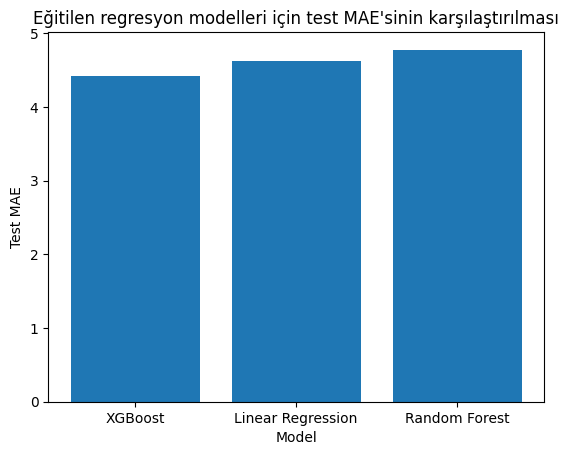

In [46]:
#Test MAE performansını görselleştirme:
model_names = ["XGBoost", "Linear Regression", "Random Forest"]
plt.bar(model_names, final_maes)
plt.xlabel("Model")
plt.ylabel("Test MAE")
plt.title("Eğitilen regresyon modelleri için test MAE'sinin karşılaştırılması")
plt.show()

**Sonuç Olarak; XGBoost Modeli Gerçek ve Tahmin Edilen Değerler Grafiği:**

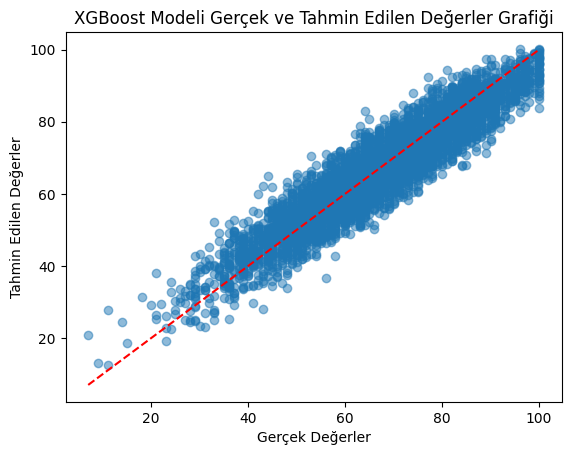

In [54]:
import matplotlib.pyplot as plt

# XGBoost Modeli Test verisi üzerindeki tahminler:
y_pred = xg_model_final.predict(X_test)

# Dağılım grafiği:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y = x doğrusu
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('XGBoost Modeli Gerçek ve Tahmin Edilen Değerler Grafiği')
plt.show()


Gerçek ve tahmin edilen değerlerin dağılım grafiğine
bakacak olursak;

-Modellerimize ait tahminlerin gerçek değerlere ne
kadar yakın  olduğunu bize gösteriyor.

-Noktalar  y = x doğrusu etrafında
yoğunlaşması, modelin yüksek doğrulukla tahmin
 yaptığını belirtiyor.

### **Tüm Modeller İçin Confusion Matrix Çizdirelim:**

Her model için ayrı ayrı Confusion Matrix çizdirdik.


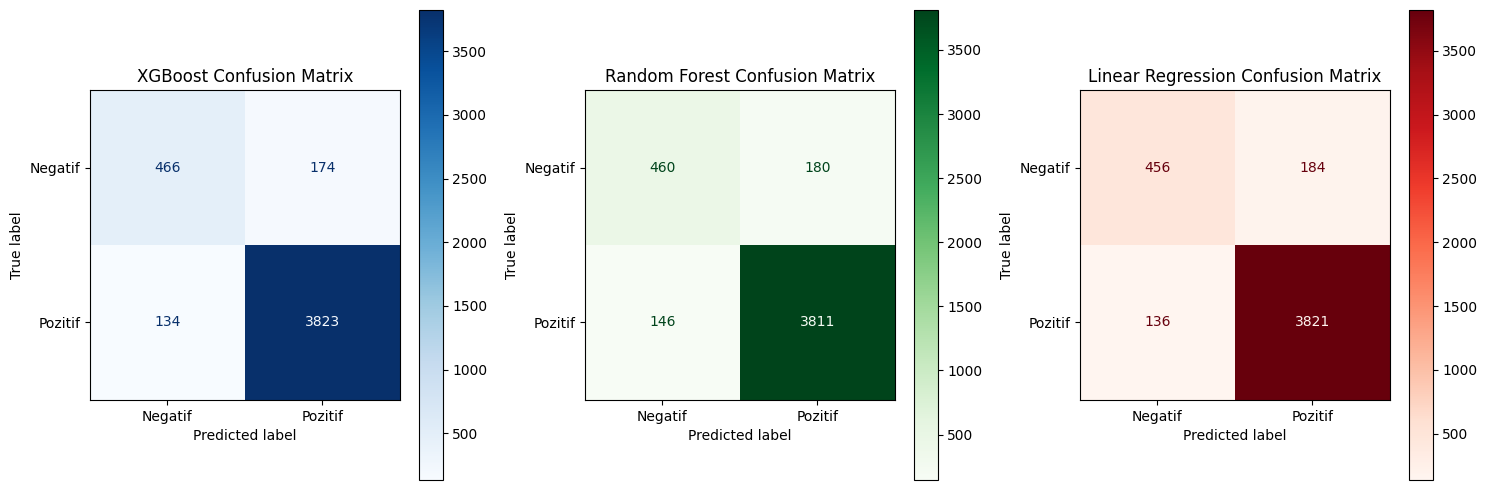

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# XGBoost, RandomForest ve Linear Regression modelleri ile test verisi üzerinde tahmin yapma
xgb_prob = xg_model_final.predict(X_test)
rf_prob = forest_model_final.predict(X_test)
lr_prob = linear_model_final.predict(X_test)

# Eşik değerine göre sınıflandırma yap
threshold = 50  # Sınıflandırma için eşik değeri (örneğin, 50'nin üzerini pozitif kabul edebiliriz)
y_pred_class_xgb = (xgb_prob >= threshold).astype(int)
y_pred_class_rf = (rf_prob >= threshold).astype(int)
y_pred_class_lr = (lr_prob >= threshold).astype(int)

# Confusion Matrix oluştur
cm_xgb = confusion_matrix(y_test >= threshold, y_pred_class_xgb)
cm_rf = confusion_matrix(y_test >= threshold, y_pred_class_rf)
cm_lr = confusion_matrix(y_test >= threshold, y_pred_class_lr)

# Confusion Matrix'i görselleştir
plt.figure(figsize=(15, 5))

# XGBoost Confusion Matrix
plt.subplot(1, 3, 1)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Negatif', 'Pozitif'])
disp_xgb.plot(cmap='Blues', ax=plt.gca())
plt.title("XGBoost Confusion Matrix")

# Random Forest Confusion Matrix
plt.subplot(1, 3, 2)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Negatif', 'Pozitif'])
disp_rf.plot(cmap='Greens', ax=plt.gca())
plt.title("Random Forest Confusion Matrix")

# Linear Regression Confusion Matrix
plt.subplot(1, 3, 3)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Negatif', 'Pozitif'])
disp_lr.plot(cmap='Reds', ax=plt.gca())
plt.title("Linear Regression Confusion Matrix")

plt.tight_layout()
plt.show()


**Sonuçların Grafiklerle Yorumlanması:**

-XGBoost Regresor modelinin en iyi model olduğunu görüyoruz, çünkü en yüksek doğru pozitif oranına ve en düşük yanlış negatif oranına sahiptir. Yanlış pozitif oranı da oldukça düşüktür, bu da modelin genel olarak iyi genelleştirme sağladığını gösterir.

-Linear Regression modeli ve Random Forest modeli, genel olarak XGBoost'a göre  daha düşük doğruluk performansı göstermektedirler ve yanlış negatif ve pozitif oranı daha yüksektir.

Alttaki tabloyu worde ekleteceğim resim olarak:
Model	Doğru Pozitif (TP)	Yanlış Pozitif (FP)	Doğru Negatif (TN)	Yanlış Negatif (FN)
XGBoost	3823	174	466	134
Random Forest	3811	180	460	146
Linear Regression	3821	184	456	136

### **Tüm Modeller İçin ROC Eğrisini Çizdirelim:**

XGBoost, RandomForest ve LinearRegression modelleri için ROC eğrisini çizdirdik. Regresyon modelleri doğrudan olasılık döndürmediğinden, çıktıları belirli bir eşik değeri ile sınıflandırmaya dönüştürdük.

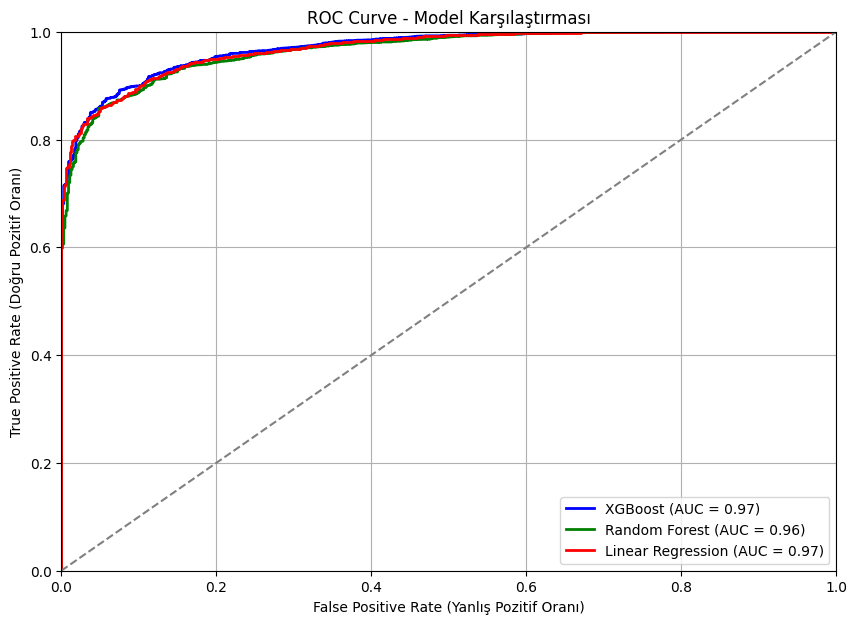

In [52]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Modellerin tahminlerini al
xgb_prob = xg_model_final.predict(X_test)
rf_prob = forest_model_final.predict(X_test)
lr_prob = linear_model_final.predict(X_test)

# Regresyon çıktıları sürekli olduğundan, ikili sınıflara dönüştürmek için bir eşik belirledim.
threshold = 50  # Örneğin, 50'nin üzeri 1 (başarılı), altı 0 (başarısız) olarak değerlendirilir.

# Sınıflandırma yapmak için eşik değerine göre çıktıların sınıflandırılmasını sağladık:
y_pred_xgb = (xgb_prob >= threshold).astype(int)
y_pred_rf = (rf_prob >= threshold).astype(int)
y_pred_lr = (lr_prob >= threshold).astype(int)

# ROC eğrisi için fpr (False Positive Rate), tpr (True Positive Rate) hesaplamak:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test >= threshold, xgb_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test >= threshold, rf_prob)
fpr_lr, tpr_lr, _ = roc_curve(y_test >= threshold, lr_prob)

# AUC (Alan Altındaki Eğri) hesaplama:
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# ROC Eğrisini Çizdirme:
plt.figure(figsize=(10, 7))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'Linear Regression (AUC = {roc_auc_lr:.2f})')

# Rastgele model için diyagonal çizgi Oluşturma:
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (Yanlış Pozitif Oranı)')
plt.ylabel('True Positive Rate (Doğru Pozitif Oranı)')
plt.title('ROC Curve - Model Karşılaştırması')
plt.legend(loc='lower right')
plt.grid()
plt.show()


**Sonuçların Grafikle Yorumlanması:**

**ROC** (Receiver Operating Characteristic) **Eğrisi** ile, üç farklı modelin (XGBoost, Random Forest ve Linear Regression) sınıflandırma performansını karşılaştırmaktayız. **ROC eğrisi**, modellerin True Positive Rate (Doğru Pozitif Oranı) ile False Positive Rate (Yanlış Pozitif Oranı) arasındaki ilişkisini bize gösterir.

**En iyi model: XGBoost ve Linear Regression modelleri**, AUC = 0.97 ile en iyi sınıflandırma performansını göstermektedir.
**Random Forest:** AUC değeri biraz daha düşük olmasına rağmen, genel olarak başarılı bir modeldir.

**Sonuç olarak;** XGBoost veya Linear Regression modeli daha iyi bir seçim olabilir, ancak diğer faktörleri yani, model karmaşıklığını, hesaplama maliyetini, yorumlanabilirliğini de göz önünde bulundurmak  sonuçlar açısından daha etkili olacaktır.